In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
print("YOLO loaded successfully")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO loaded successfully


In [3]:
model = YOLO("yolov8n.pt")
print("Model loaded OK")


Model loaded OK


In [4]:
from google.colab import files
uploaded = files.upload()


Saving SV01_1.jpg to SV01_1.jpg
Saving SV01_2.jpg to SV01_2.jpg
Saving SV01_3.jpg to SV01_3.jpg
Saving SV02_1.jpg to SV02_1.jpg
Saving SV02_2.jpg to SV02_2.jpg
Saving SV02_3.jpg to SV02_3.jpg
Saving SV03_1.jpg to SV03_1.jpg
Saving SV03_2.jpg to SV03_2.jpg
Saving SV03_3.jpg to SV03_3.jpg


In [5]:
import os
os.listdir()


['.config',
 'SV02_3.jpg',
 'yolov8n.pt',
 'SV03_3.jpg',
 'SV01_1.jpg',
 'SV01_3.jpg',
 'SV03_1.jpg',
 'SV03_2.jpg',
 'SV01_2.jpg',
 'SV02_2.jpg',
 'SV02_1.jpg',
 'sample_data']

In [6]:
img_path = "SV01_1.jpg"

results = model(img_path, conf=0.25)



image 1/1 /content/SV01_1.jpg: 640x480 1 person, 349.4ms
Speed: 14.8ms preprocess, 349.4ms inference, 38.3ms postprocess per image at shape (1, 3, 640, 480)


In [7]:
saved_path = results[0].save()
print("Saved to:", saved_path)


Saved to: results_SV01_1.jpg


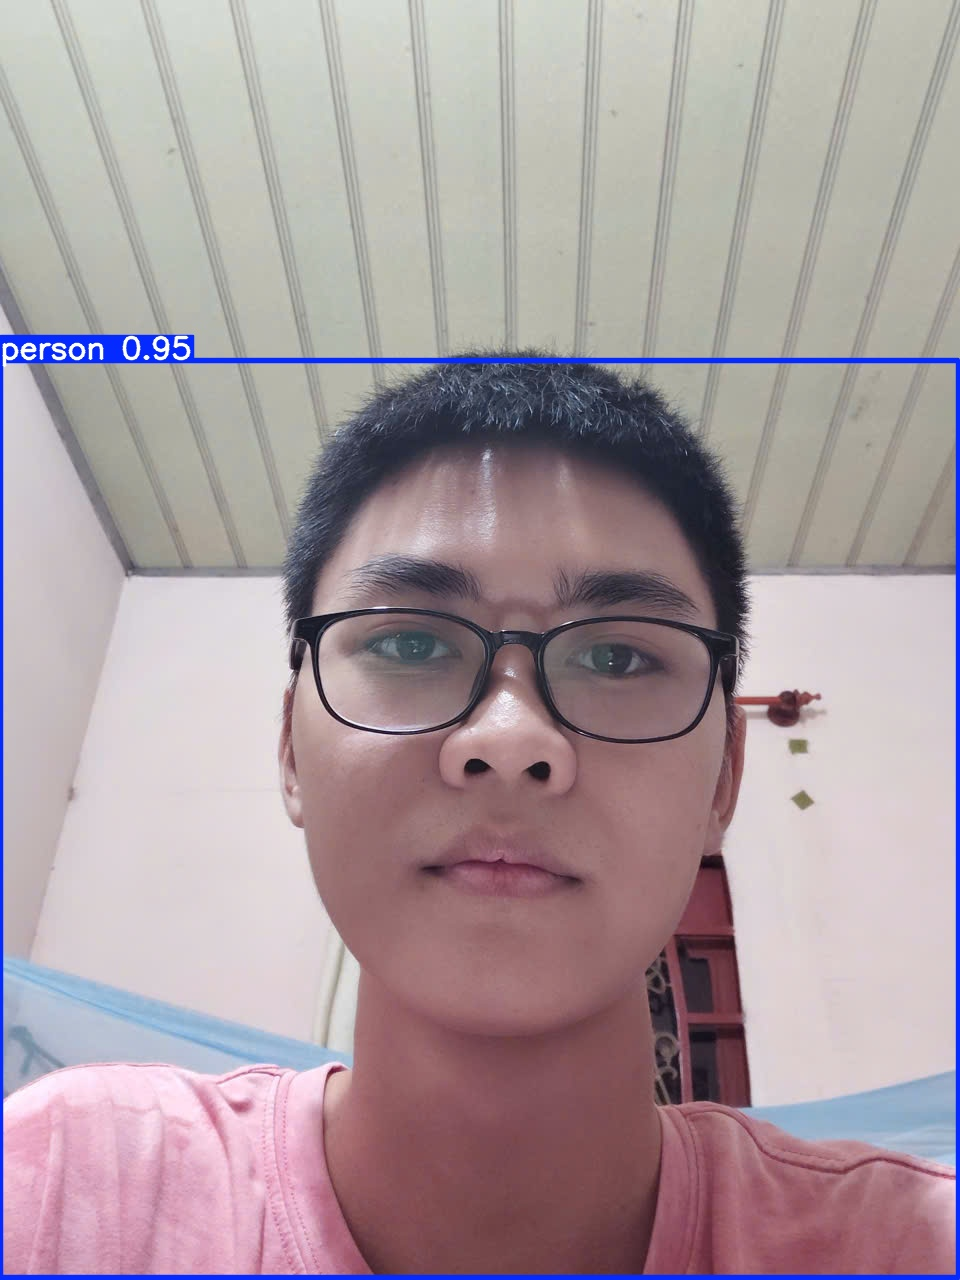

In [9]:
from PIL import Image
Image.open("results_SV01_1.jpg")


In [ ]:
files.download("results_test.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import cv2
import numpy as np
from PIL import Image


In [11]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [12]:
box = results[0].boxes[0]
x1, y1, x2, y2 = map(int, box.xyxy[0])
conf = float(box.conf[0])

print("Bounding box:", x1, y1, x2, y2)
print("Confidence:", conf)


Bounding box: 0 360 958 1277
Confidence: 0.9538676738739014


In [13]:
face_crop = img_rgb[y1:y2, x1:x2]


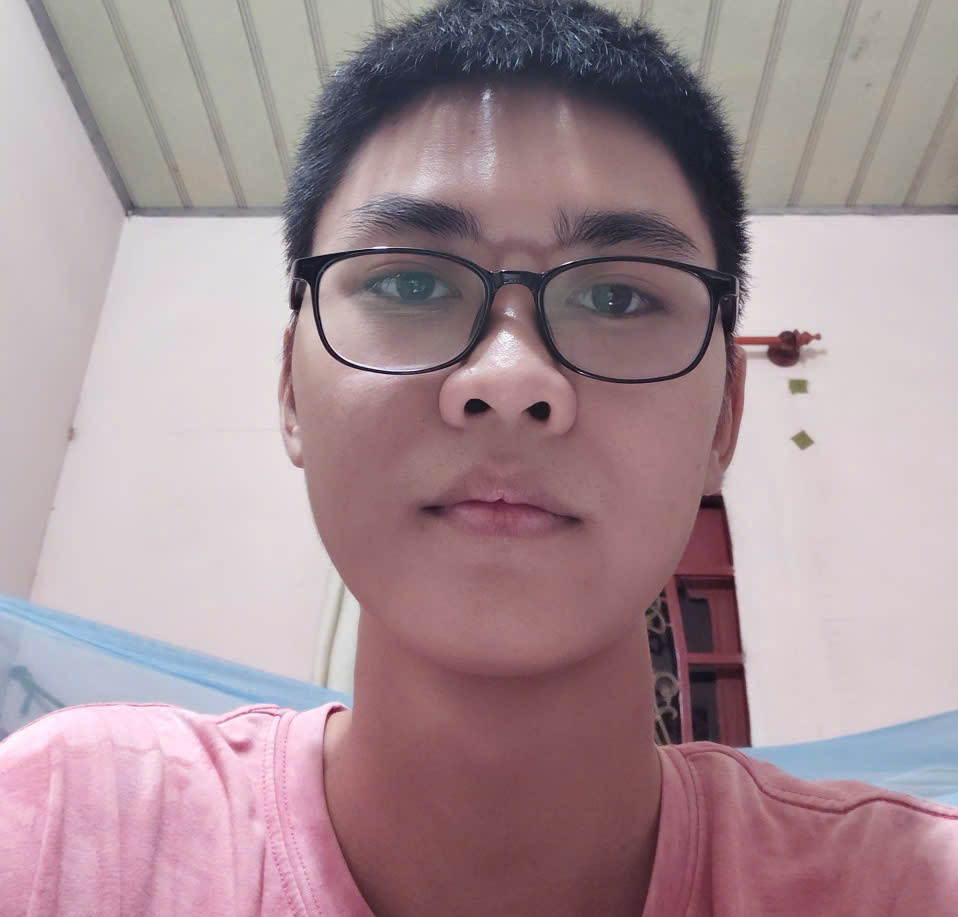

In [14]:
Image.fromarray(face_crop)


In [15]:
Image.fromarray(face_crop).save("face_crop.jpg")


In [ ]:
files.download("face_crop.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!pip install insightface onnxruntime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp312-cp312-linux_x86_64.whl size=1071406 sha256=41678f4dfdbc0ac99aada67aab13b7572ca9344644613896bf64de78edbf791d
  Stored in directory: /root/.cache/pip/wheels/73/3c/e2/6d4815e8a8b33a2006554d65ce0d1f973e768f4c7a222fa675
Successfully built insightface


In [17]:
from insightface.app import FaceAnalysis

app = FaceAnalysis(name="buffalo_l", providers=["CPUExecutionProvider"])
app.prepare(ctx_id=0)


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 72124.96KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [18]:
import cv2

face_img = cv2.imread("face_crop.jpg")
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)


In [19]:
faces = app.get(face_img)

len(faces)


1

In [20]:
embedding = faces[0].embedding

print("Embedding shape:", embedding.shape)


Embedding shape: (512,)


In [21]:
from insightface.app import FaceAnalysis
import cv2
import numpy as np
from numpy.linalg import norm

app = FaceAnalysis(name="buffalo_l", providers=["CPUExecutionProvider"])
app.prepare(ctx_id=0)

def get_embedding(img_path: str):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = app.get(img)
    if len(faces) == 0:
        raise ValueError(f"Không thấy mặt trong ảnh: {img_path}")
    return faces[0].embedding

def cosine_similarity(a, b):
    return float(np.dot(a, b) / (norm(a) * norm(b)))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [22]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(a, b):
    return np.dot(a, b) / (norm(a) * norm(b))


In [23]:
embedding1 = get_embedding("SV01_1.jpg")
embedding2 = get_embedding("SV01_2.jpg")



In [24]:
sim = cosine_similarity(embedding1, embedding2)
print("Cosine similarity:", sim)


Cosine similarity: 0.78456175


In [25]:
!pip install faiss-cpu -q
import faiss
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 30.8 MB/s eta 0:00:00


In [26]:
# --- 0) cài đặt/import ---
!pip install ultralytics -q

import os
from ultralytics import YOLO
import cv2

# --- 1) load model ---
model = YOLO("yolov8n.pt")  # hiện bạn đang dùng model này

# --- 2) lấy danh sách ảnh SV ---
img_files = [f for f in os.listdir() if f.startswith("SV") and f.lower().endswith((".jpg", ".png"))]
img_files.sort()
print("Found images:", len(img_files))
print(img_files[:10])

# --- 3) tạo folder output ---
out_dir = "cropped"
os.makedirs(out_dir, exist_ok=True)

def crop_with_margin(img, x1, y1, x2, y2, margin=0.15):
    """Cắt ảnh theo box và nới margin để đỡ cắt cụt."""
    h, w = img.shape[:2]
    bw = x2 - x1
    bh = y2 - y1
    mx = int(bw * margin)
    my = int(bh * margin)
    x1 = max(0, x1 - mx)
    y1 = max(0, y1 - my)
    x2 = min(w, x2 + mx)
    y2 = min(h, y2 + my)
    return img[y1:y2, x1:x2]

skipped = []
saved = []

for f in img_files:
    img = cv2.imread(f)
    if img is None:
        skipped.append((f, "cannot_read"))
        continue

    # YOLO inference
    r = model(f, conf=0.25, verbose=False)[0]
    if r.boxes is None or len(r.boxes) == 0:
        skipped.append((f, "no_box"))
        continue

    # lấy box có confidence cao nhất
    confs = r.boxes.conf.cpu().numpy()
    best_i = int(confs.argmax())
    box = r.boxes.xyxy[best_i].cpu().numpy().astype(int)  # (x1,y1,x2,y2)
    x1, y1, x2, y2 = box.tolist()

    crop = crop_with_margin(img, x1, y1, x2, y2, margin=0.15)

    # nếu crop quá nhỏ thì skip
    if crop.shape[0] < 40 or crop.shape[1] < 40:
        skipped.append((f, "crop_too_small"))
        continue

    out_path = os.path.join(out_dir, f)
    cv2.imwrite(out_path, crop)
    saved.append(out_path)

print("Saved crops:", len(saved))
print("Skipped:", len(skipped))
if skipped:
    print("Some skipped examples:", skipped[:10])


Found images: 9
['SV01_1.jpg', 'SV01_2.jpg', 'SV01_3.jpg', 'SV02_1.jpg', 'SV02_2.jpg', 'SV02_3.jpg', 'SV03_1.jpg', 'SV03_2.jpg', 'SV03_3.jpg']
Saved crops: 9
Skipped: 0


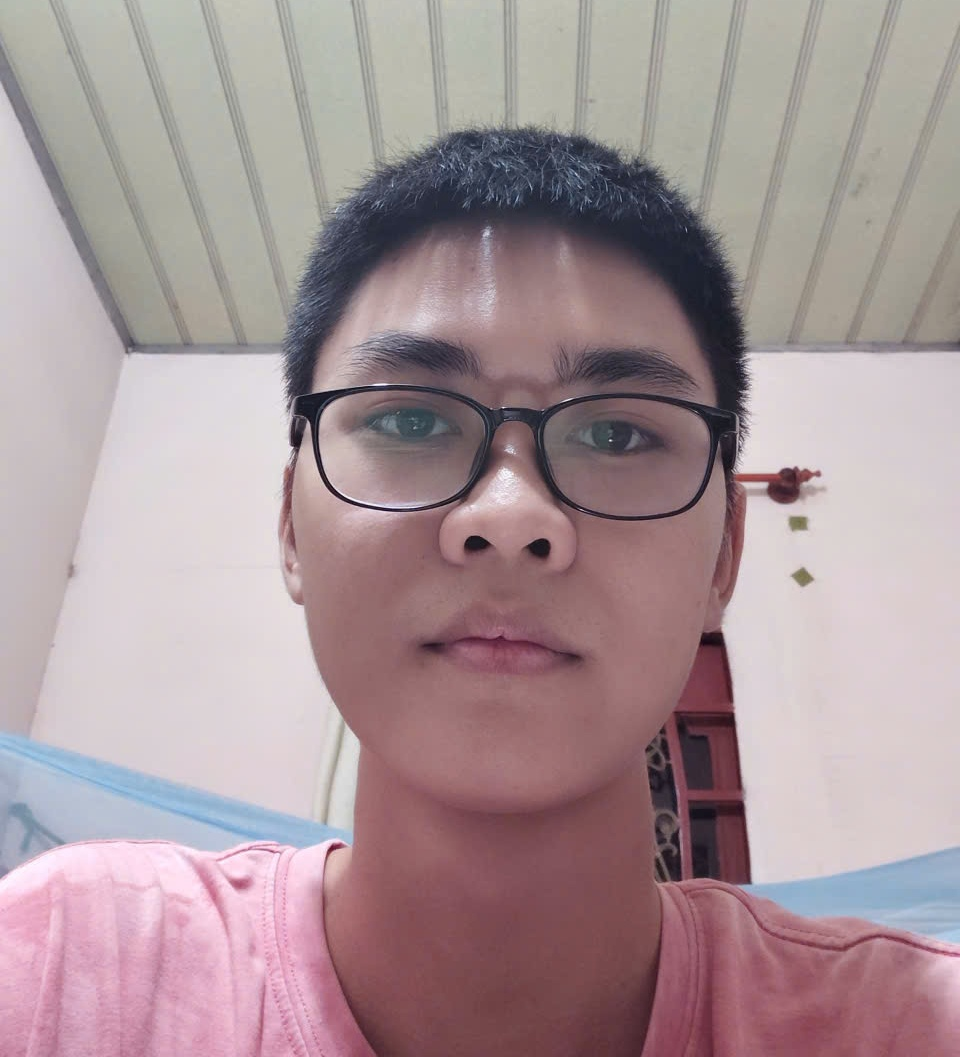

In [27]:
from PIL import Image
Image.open("cropped/" + img_files[0])


In [28]:
gallery_files = [os.path.join("cropped", f) for f in os.listdir("cropped") if f.startswith("SV") and f.lower().endswith((".jpg",".png"))]
gallery_files.sort()
print(gallery_files[:9])


['cropped/SV01_1.jpg', 'cropped/SV01_2.jpg', 'cropped/SV01_3.jpg', 'cropped/SV02_1.jpg', 'cropped/SV02_2.jpg', 'cropped/SV02_3.jpg', 'cropped/SV03_1.jpg', 'cropped/SV03_2.jpg', 'cropped/SV03_3.jpg']


In [29]:
import os
student_id = os.path.basename(f).split("_")[0]


In [30]:
import os, numpy as np

gallery_files = [os.path.join("cropped", f) for f in os.listdir("cropped")
                 if f.startswith("SV") and f.lower().endswith((".jpg",".png"))]
gallery_files.sort()
print("Gallery:", gallery_files)


Gallery: ['cropped/SV01_1.jpg', 'cropped/SV01_2.jpg', 'cropped/SV01_3.jpg', 'cropped/SV02_1.jpg', 'cropped/SV02_2.jpg', 'cropped/SV02_3.jpg', 'cropped/SV03_1.jpg', 'cropped/SV03_2.jpg', 'cropped/SV03_3.jpg']


In [31]:
!pip install -q insightface onnxruntime faiss-cpu opencv-python

import os, cv2, numpy as np
from numpy.linalg import norm
from insightface.app import FaceAnalysis

app = FaceAnalysis(name="buffalo_l", providers=["CPUExecutionProvider"])
app.prepare(ctx_id=0, det_size=(640, 640))  # det_size lớn giúp dễ bắt mặt

def get_embedding_robust(img_path: str):
    """Trả về embedding (512,) đã normalize; None nếu không thấy mặt."""
    img = cv2.imread(img_path)
    if img is None:
        print("READ FAIL:", img_path)
        return None
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # thử detect lần 1
    faces = app.get(rgb)

    # nếu fail, upscale rồi thử lại (cứu thumbnail/mờ)
    if len(faces) == 0:
        h, w = rgb.shape[:2]
        scale = 800 / max(h, w)
        rgb2 = cv2.resize(rgb, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_CUBIC)
        faces = app.get(rgb2)

    if len(faces) == 0:
        # không thấy mặt
        return None

    # lấy face lớn nhất
    faces = sorted(
        faces,
        key=lambda f: (f.bbox[2]-f.bbox[0])*(f.bbox[3]-f.bbox[1]),
        reverse=True
    )
    e = faces[0].embedding.astype("float32")
    e = e / (norm(e) + 1e-8)
    return e


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [32]:
gallery_files = [os.path.join("cropped", f) for f in os.listdir("cropped")
                 if f.lower().endswith((".jpg",".png")) and f.startswith("SV")]
gallery_files.sort()
print("Gallery files:", gallery_files)

embs, labels, kept_files, failed = [], [], [], []

for f in gallery_files:
    sid = os.path.basename(f).split("_")[0]  # SV01_1.jpg -> SV01
    e = get_embedding_robust(f)
    if e is None:
        failed.append(f)
        continue
    embs.append(e)
    labels.append(sid)
    kept_files.append(f)

print("Kept:", len(embs), "/", len(gallery_files))
if failed:
    print("Failed files:", failed)

# nếu vẫn 0 thì dừng luôn để khỏi vstack lỗi
assert len(embs) > 0, "Không extract được embedding nào. Ảnh có thể quá nhỏ/mờ."
embs = np.vstack(embs).astype("float32")
print("Embeddings matrix:", embs.shape)  # (N, 512)


Gallery files: ['cropped/SV01_1.jpg', 'cropped/SV01_2.jpg', 'cropped/SV01_3.jpg', 'cropped/SV02_1.jpg', 'cropped/SV02_2.jpg', 'cropped/SV02_3.jpg', 'cropped/SV03_1.jpg', 'cropped/SV03_2.jpg', 'cropped/SV03_3.jpg']
Kept: 9 / 9
Embeddings matrix: (9, 512)


In [33]:
import faiss

d = embs.shape[1]  # 512
index = faiss.IndexFlatIP(d)   # inner product ~ cosine vì đã normalize
index.add(embs)
print("FAISS index size:", index.ntotal)

# Query thử: chọn 1 ảnh bất kỳ (có thể dùng chính gallery)
query_path = "cropped/SV01_1.jpg"  # đổi nếu bạn muốn
q = get_embedding_robust(query_path)
assert q is not None, "Query ảnh không detect được mặt."
q = q.reshape(1, -1).astype("float32")

topk = 5
scores, idxs = index.search(q, topk)

uw = []
print("Top-k results for:", query_path)
for rank, (score, idx) in enumerate(zip(scores[0], idxs[0]), start=1):
    print(rank, labels[idx], "score=", float(score), "file=", kept_files[idx])

# threshold demo
best_score = float(scores[0][0])
best_id = labels[idxs[0][0]]
THRESH = 0.75  # bạn đang thấy 0.78 ~ cùng người, nên demo để 0.75
print("\nDecision:")
print("best_id:", best_id, "best_score:", best_score)
print("✅ ACCEPT" if best_score >= THRESH else "❌ REJECT")


FAISS index size: 9
Top-k results for: cropped/SV01_1.jpg
1 SV01 score= 1.0 file= cropped/SV01_1.jpg
2 SV01 score= 0.8853957056999207 file= cropped/SV01_3.jpg
3 SV01 score= 0.8099558353424072 file= cropped/SV01_2.jpg
4 SV03 score= 0.24935826659202576 file= cropped/SV03_1.jpg
5 SV03 score= 0.23435884714126587 file= cropped/SV03_3.jpg

Decision:
best_id: SV01 best_score: 1.0
✅ ACCEPT


In [34]:
# build index bỏ SV01_1 khỏi gallery
train_files = [f for f in kept_files if os.path.basename(f) != "SV01_1.jpg"]

embs2, labels2, files2 = [], [], []
for f in train_files:
    sid = os.path.basename(f).split("_")[0]
    e = get_embedding_robust(f)
    if e is None:
        continue
    embs2.append(e)
    labels2.append(sid)
    files2.append(f)

embs2 = np.vstack(embs2).astype("float32")
index2 = faiss.IndexFlatIP(embs2.shape[1])
index2.add(embs2)

# query SV01_1 (ảnh không có trong index)
query_path = "cropped/SV01_1.jpg"
q = get_embedding_robust(query_path).reshape(1, -1).astype("float32")

scores, idxs = index2.search(q, 5)
print("Top-5 (leave-one-out):")
for rank, (score, idx) in enumerate(zip(scores[0], idxs[0]), start=1):
    print(rank, labels2[idx], "score=", float(score), "file=", files2[idx])


Top-5 (leave-one-out):
1 SV01 score= 0.8853957056999207 file= cropped/SV01_3.jpg
2 SV01 score= 0.8099558353424072 file= cropped/SV01_2.jpg
3 SV03 score= 0.24935826659202576 file= cropped/SV03_1.jpg
4 SV03 score= 0.23435884714126587 file= cropped/SV03_3.jpg
5 SV03 score= 0.2246827334165573 file= cropped/SV03_2.jpg


In [35]:
THRESH = 0.75

def identify(image_path, index, labels, files, topk=5):
    q = get_embedding_robust(image_path)
    if q is None:
        return {"ok": False, "error": "no_face_detected"}

    q = q.reshape(1, -1).astype("float32")
    scores, idxs = index.search(q, topk)

    results = []
    for score, idx in zip(scores[0], idxs[0]):
        results.append({
            "student_id": labels[idx],
            "score": float(score),
            "ref_file": files[idx],
        })

    best = results[0]
    return {
        "ok": True,
        "query": image_path,
        "best_id": best["student_id"],
        "best_score": best["score"],
        "accept": best["score"] >= THRESH,
        "topk": results
    }


In [36]:
out = identify("cropped/SV01_1.jpg", index2, labels2, files2, topk=5)
out


{'ok': True,
 'query': 'cropped/SV01_1.jpg',
 'best_id': 'SV01',
 'best_score': 0.8853957056999207,
 'accept': True,
 'topk': [{'student_id': 'SV01',
   'score': 0.8853957056999207,
   'ref_file': 'cropped/SV01_3.jpg'},
  {'student_id': 'SV01',
   'score': 0.8099558353424072,
   'ref_file': 'cropped/SV01_2.jpg'},
  {'student_id': 'SV03',
   'score': 0.24935826659202576,
   'ref_file': 'cropped/SV03_1.jpg'},
  {'student_id': 'SV03',
   'score': 0.23435884714126587,
   'ref_file': 'cropped/SV03_3.jpg'},
  {'student_id': 'SV03',
   'score': 0.2246827334165573,
   'ref_file': 'cropped/SV03_2.jpg'}]}